In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df=pd.read_csv('IOT-temp.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [4]:
df.drop(["room_id/id"], axis = 1, inplace = True) 
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [5]:
df['noted_date']=pd.to_datetime(df['noted_date'])
df_new=df.set_index('noted_date')
df_new.head()

,id,temp,out/in
noted_date,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In


In [6]:
df=df_new.groupby(df_new.index).mean()

C:\Users\Lohith\AppData\Local\Temp\ipykernel_35256\3670350874.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df_new.groupby(df_new.index).mean()


<AxesSubplot: xlabel='noted_date'>

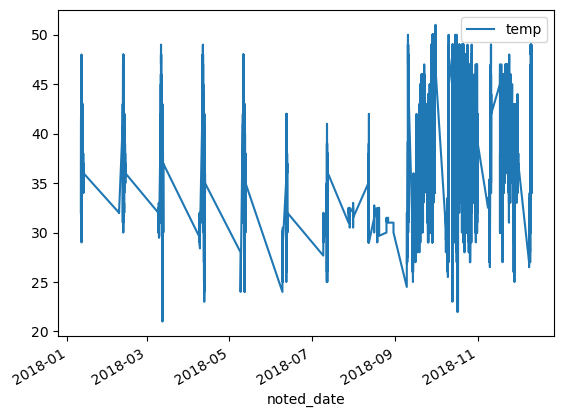

In [7]:
df.plot()

In [8]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ss = scaler.fit_transform(df)

Text(0, 0.5, 'temperature')

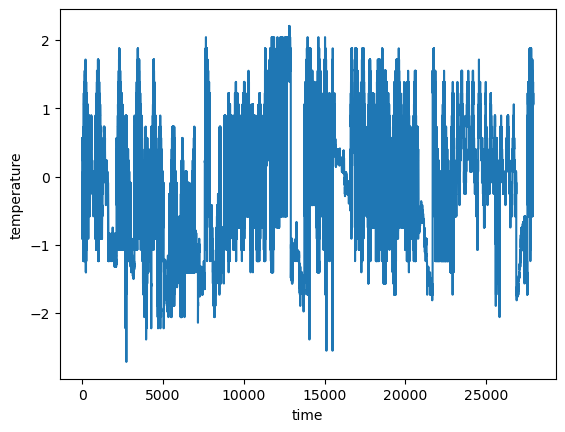

In [9]:
plt.plot(df_ss)
plt.xlabel('time')
plt.ylabel('temperature')

In [10]:
temp = df.loc[:,['temp']]
rolling_mean = temp.rolling(window=52).mean()
rolling_standardDeviation = temp.rolling(window=52).std()

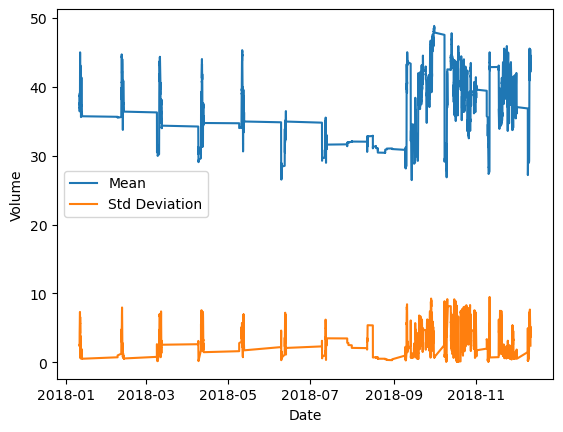

In [11]:
plt.xlabel("Date")
plt.ylabel("Volume")

#plt.plot(volume)
plt.plot(rolling_mean)
plt.plot(rolling_standardDeviation)

plt.legend(["Mean", "Std Deviation"])

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adftest = adfuller(temp["temp"])
print(adftest)

(-7.502398576447216, 4.219817023527762e-11, 42, 27877, {'1%': -3.43058459849508, '5%': -2.861643685903541, '10%': -2.5668251888927816}, 152413.84734850161)


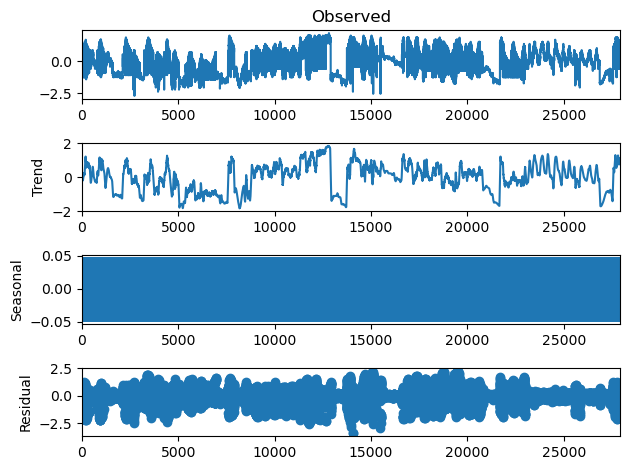

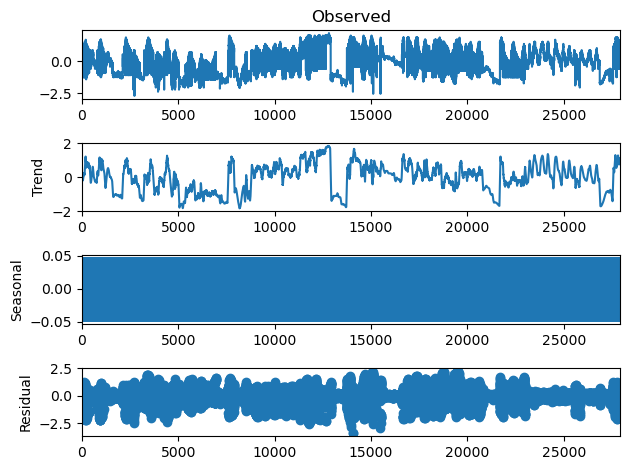

In [14]:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_ss, model='additive', period=52)
result.plot()

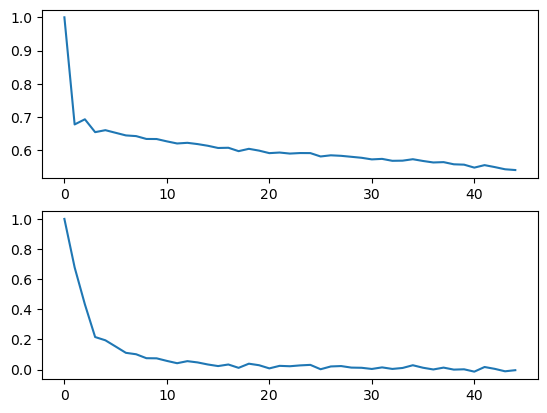

In [15]:
from statsmodels.tsa.stattools import acf, pacf

d_acf = acf(df_ss)
d_pacf = pacf(df_ss)

plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(df_ss,order=(1,0,3))
model=h.fit()

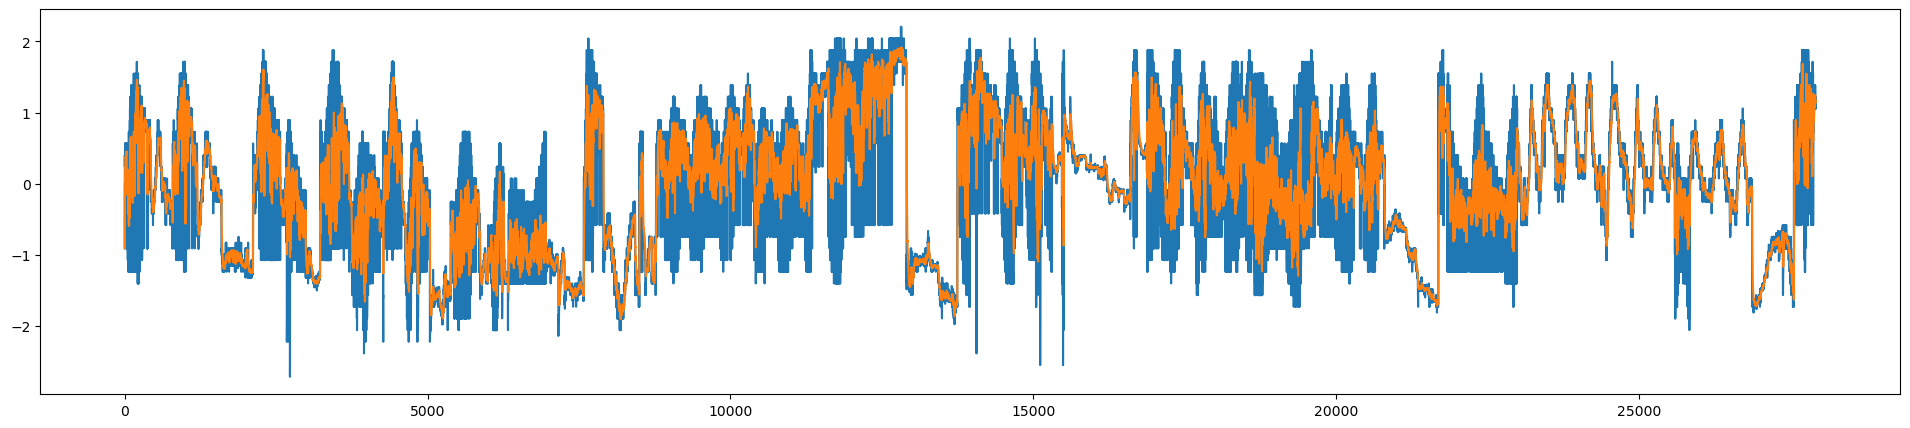

In [17]:
plt.figure(figsize=(24,5))
plt.plot(df_ss)
plt.plot(model.predict())
plt.show()
